In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
data_path = 'E:\\Realestate.xlsx'
df = pd.read_excel(data_path)
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
df.dtypes

No                                          int64
X1 transaction date                       float64
X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
dtype: object

In [4]:
df.shape

(414, 8)

In [5]:
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [6]:
df.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [7]:
df.drop(['No', 'X1 transaction date'], inplace = True, axis = 1)
df.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


In [8]:
df.rename(columns={"X2 house age": "House_Age", "X3 distance to the nearest MRT station": "Dist_to_nearest_MRT", "X4 number of convenience stores":"Number_of_stores", "X5 latitude":"Latitude", \
                  "X6 longitude" : "Longitude", "Y house price of unit area":"Price_per_unit"}, inplace = True)
df.head()

,House_Age,Dist_to_nearest_MRT,Number_of_stores,Latitude,Longitude,Price_per_unit
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


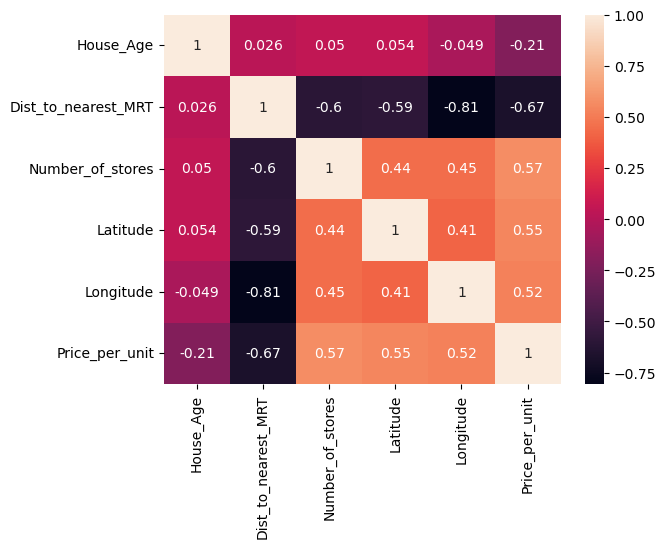

In [9]:
corr = df.corr()
sns.heatmap(corr, annot = True)
plt.show()

In [10]:
x = df[['House_Age', 'Dist_to_nearest_MRT', 'Number_of_stores']]
y = df.Price_per_unit

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.3,random_state=42)

In [12]:
model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_train, y_train)

0.4866945242874341

In [13]:
model.score(x_test,y_test)

0.5619303321653489

In [14]:
y_predict = model.predict(x_test)
summary = pd.DataFrame({'predicted':y_predict, 'test':y_test})
summary.head()

,predicted,test
358,51.179442,45.1
350,44.583572,42.3
373,44.483372,52.2
399,41.476071,37.3
369,29.637343,22.8


<Axes: xlabel='predicted', ylabel='test'>

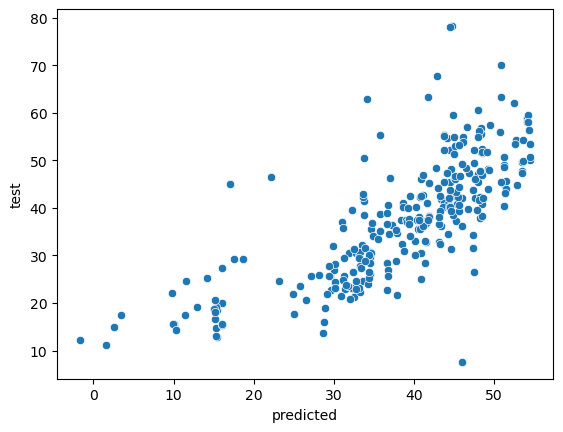

In [15]:
sns.scatterplot(summary, x = 'predicted', y = 'test')

In [16]:
summary.describe()

,predicted,test
count,290.000000,290.000000
mean,38.329741,37.590690
std,11.088104,12.775499
min,-1.737515,7.600000
25%,33.113697,27.700000
50%,40.831664,38.100000
75%,45.907729,46.350000
max,54.519995,78.300000


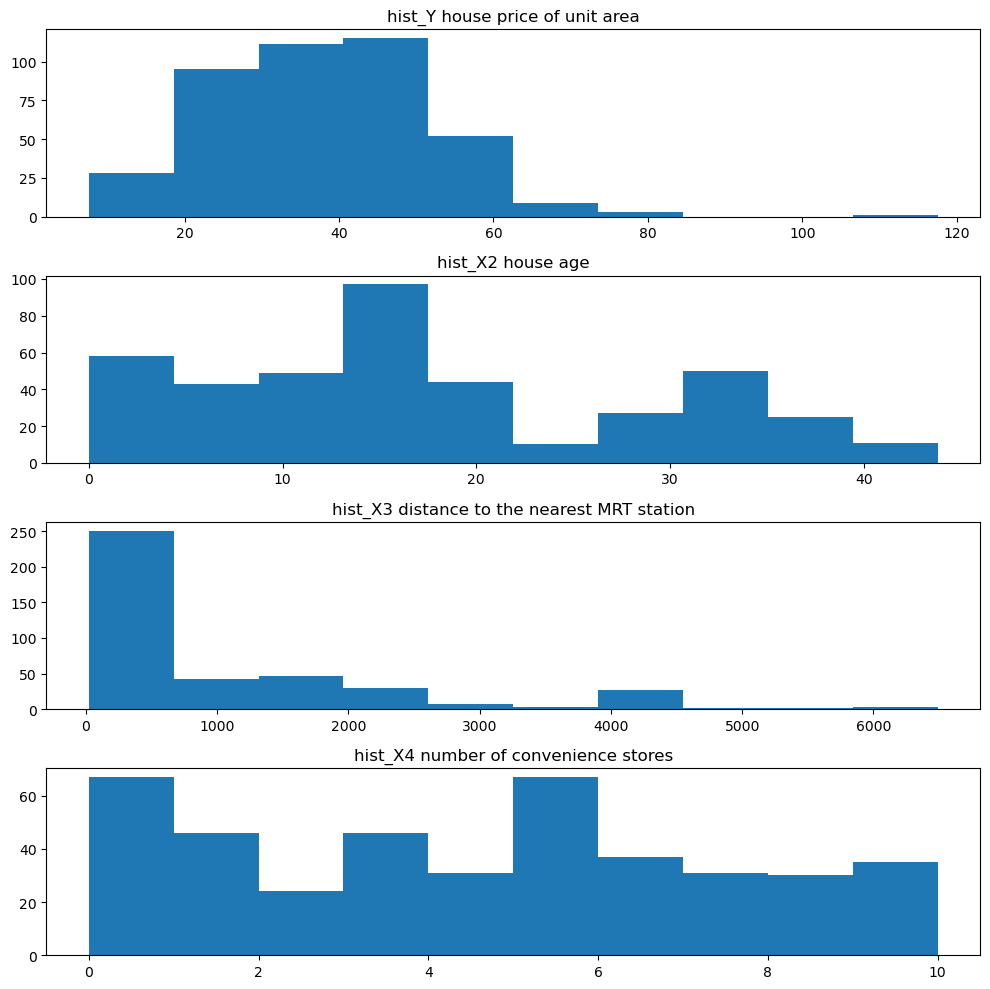

In [17]:
plt.figure(figsize=(10, 10))

plt.subplot(4, 1, 1)
plt.hist(df['Price_per_unit'])
plt.title('hist_Y house price of unit area')

plt.subplot(4, 1, 2)
plt.hist(df['House_Age'])
plt.title('hist_X2 house age')

plt.subplot(4, 1, 3)
plt.hist(df['Dist_to_nearest_MRT'])
plt.title('hist_X3 distance to the nearest MRT station')

plt.subplot(4, 1, 4)
plt.hist(df['Number_of_stores'])
plt.title('hist_X4 number of convenience stores')

plt.tight_layout()
plt.show()




In [18]:
from sklearn.ensemble import RandomForestRegressor

In [19]:
rnd=RandomForestRegressor(n_estimators=60) #creating ab for rc

In [20]:
rnd.fit(x_train,y_train)

RandomForestRegressor(n_estimators=60)

In [21]:
prd=rnd.predict(x_test)

In [22]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,prd)
mse #overfitting

56.68025629090621

In [23]:
m=r2_score(y_test,prd)
m

0.6515213145754957